Combien de réalisations de X ?  10
Combien d'expériences ?  4


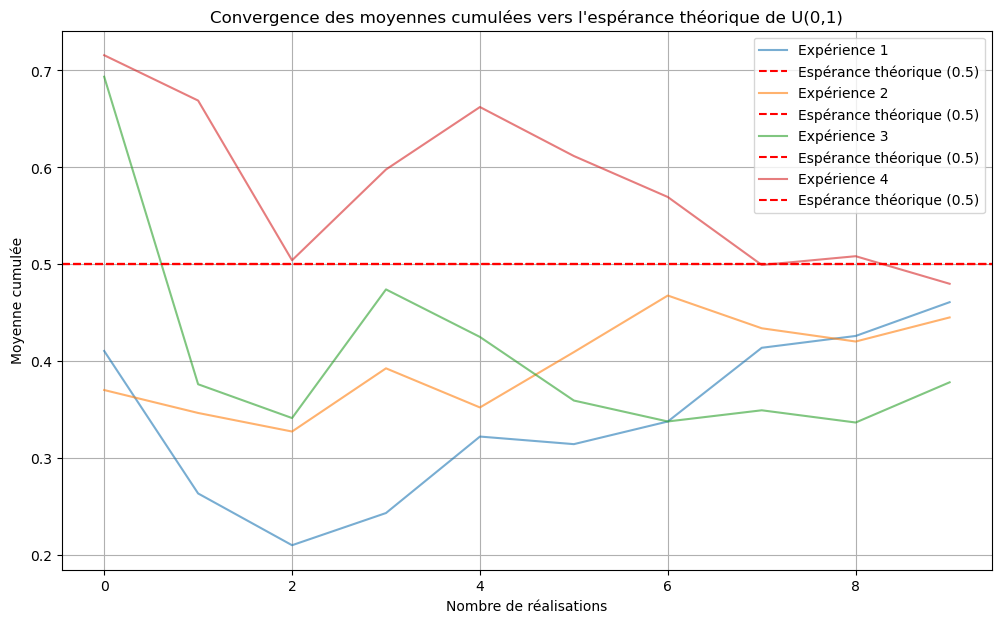

In [2]:
#Exercice 1: Loi des grands nombres et convergence
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Combien de réalisations de X ? "))
m = int(input("Combien d'expériences ? "))

expected_mean = 0.5

plt.figure(figsize=(12, 7))

for i in range(m):
   valeurs = np.random.uniform(0, 1, n)
   moyennes_cumulees = np.cumsum(valeurs) / np.arange(1, n + 1)
   plt.plot(moyennes_cumulees, label=f'Expérience {i+1}', alpha=0.6) 
   plt.axhline(expected_mean, color='red', linestyle='--', label='Espérance théorique (0.5)')
plt.title("Convergence des moyennes cumulées vers l'espérance théorique de U(0,1)")
plt.xlabel("Nombre de réalisations")
plt.ylabel("Moyenne cumulée")
plt.legend()
plt.grid(True)
plt.show()


Combien de points à tirer ?  4


Estimation finale de π après 4 points : 2.0


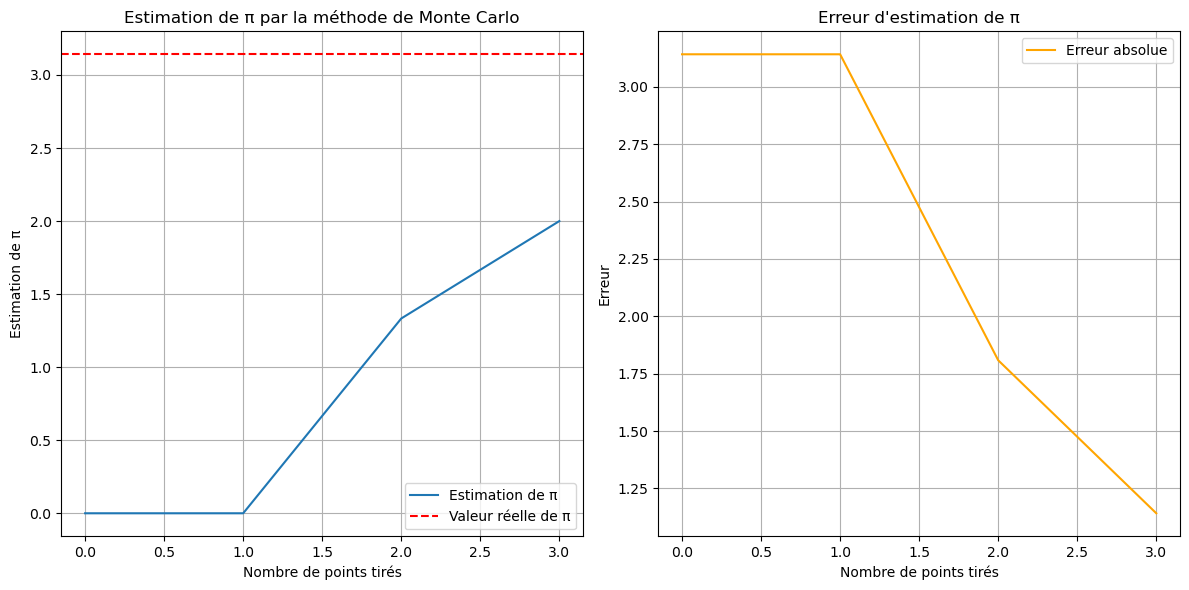

In [3]:
#Exercice2: Estimation de π par méthode de Monte Carlo
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Combien de points à tirer ? "))
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

inside_circle = (x**2 + y**2) <= 1

cumulative_inside = np.cumsum(inside_circle)

pi_estimations = 4 * cumulative_inside / np.arange(1, n+1)

error = np.abs(np.pi - pi_estimations)

print(f"Estimation finale de π après {n} points : {pi_estimations[-1]}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(pi_estimations, label="Estimation de π")
plt.axhline(np.pi, color='red', linestyle='--', label="Valeur réelle de π")
plt.xlabel("Nombre de points tirés")
plt.ylabel("Estimation de π")
plt.title("Estimation de π par la méthode de Monte Carlo")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(error, color='orange', label="Erreur absolue")
plt.xlabel("Nombre de points tirés")
plt.ylabel("Erreur")
plt.title("Erreur d'estimation de π")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Entrez la probabilité de succès p (entre 0 et 1) :  0.4
Combien de réalisations voulez-vous simuler ?  4


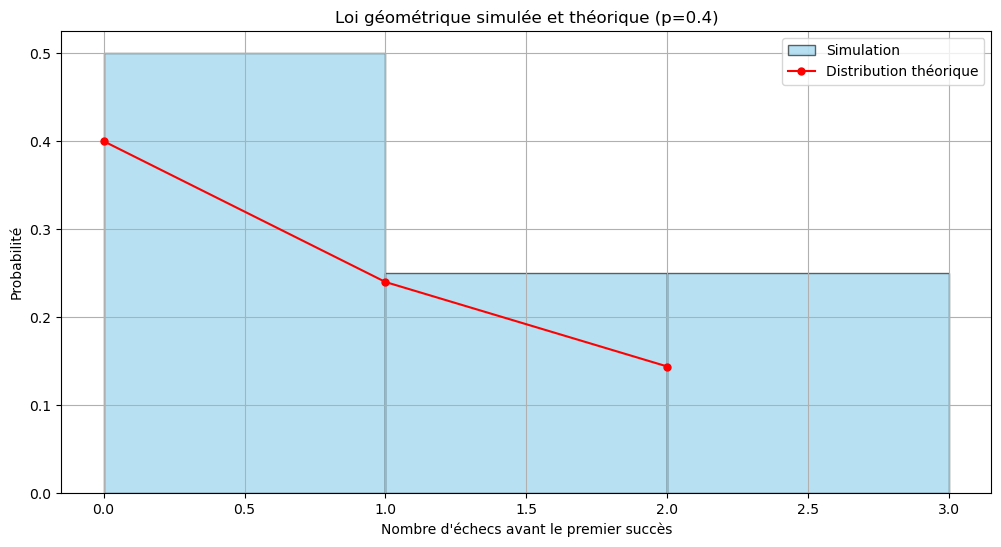

In [4]:
#Exercice3:Loi géométrique simulée
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

p = float(input("Entrez la probabilité de succès p (entre 0 et 1) : "))
n = int(input("Combien de réalisations voulez-vous simuler ? "))
simulations = np.random.geometric(p, n) - 1

plt.figure(figsize=(12, 6))
max_val = simulations.max()

counts, bins, patches = plt.hist(simulations, bins=range(max_val + 2), density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Simulation")

x = np.arange(0, max_val + 1)
theoretical_pmf = geom.pmf(x + 1, p) 

plt.plot(x, theoretical_pmf, 'ro-', label="Distribution théorique", markersize=5)
plt.xlabel("Nombre d'échecs avant le premier succès")
plt.ylabel("Probabilité")
plt.title(f"Loi géométrique simulée et théorique (p={p})")
plt.legend()
plt.grid(True)
plt.show()

Probabilité de succès p (entre 0 et 1) :  0.5
Nombre de variables binomiales à sommer :  7
Nombre d'essais dans chaque variable binomiale :  20
Nombre de simulations :  10


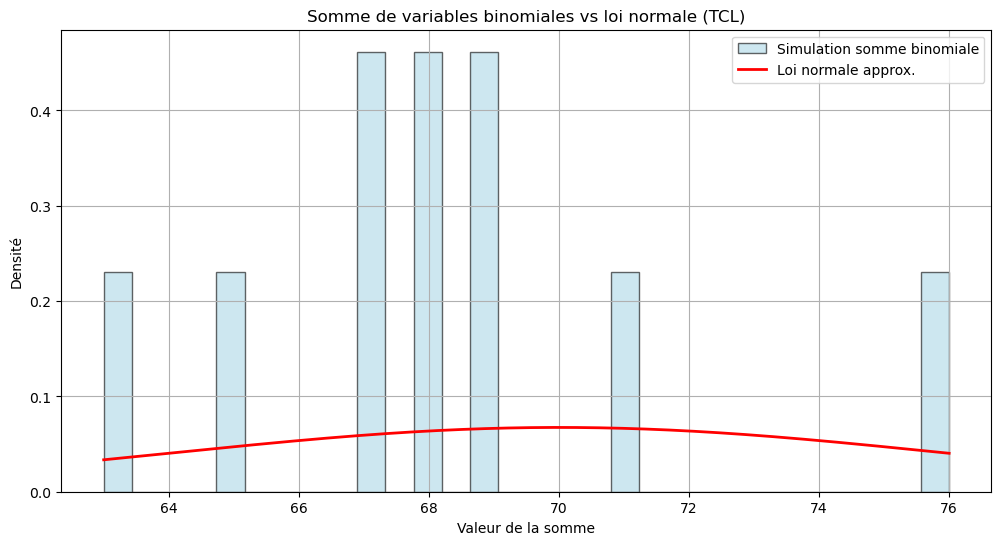

In [6]:
#Exercice 4:Somme de variables binomiales
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

p = float(input("Probabilité de succès p (entre 0 et 1) : "))
n = int(input("Nombre de variables binomiales à sommer : "))
trials = int(input("Nombre d'essais dans chaque variable binomiale : "))
simulations = int(input("Nombre de simulations : "))

somme_binom = []
for _ in range(simulations):
    variables = np.random.binomial(trials, p, n)
    somme_binom.append(np.sum(variables))

somme_binom = np.array(somme_binom)
mu = n * trials * p
sigma = np.sqrt(n * trials * p * (1 - p))

plt.figure(figsize=(12, 6))
count, bins, _ = plt.hist(somme_binom, bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black', label="Simulation somme binomiale")

x = np.linspace(min(bins), max(bins), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2, label="Loi normale approx.")
plt.xlabel("Valeur de la somme")
plt.ylabel("Densité")
plt.title("Somme de variables binomiales vs loi normale (TCL)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#Exercice5: Chaîne de Markov simple
import numpy as np

P = np.array([[0.1, 0.6, 0.3],
              [0.4, 0.3, 0.3],
              [0.2, 0.5, 0.3]])

n = int(input("Longueur de chaque chaîne (nombre de transitions) : "))
simulations = int(input("Nombre de trajectoires à simuler : "))

num_states = P.shape[0]
counts = np.zeros(num_states)

for _ in range(simulations):
    state = np.random.choice(num_states)  # état initial choisi aléatoirement
    for _ in range(n):
        state = np.random.choice(num_states, p=P[state])
    counts[state] += 1

probas_empiriques = counts / simulations

for i, p_emp in enumerate(probas_empiriques):
    print(f"Probabilité empirique d'être dans l'état {i} après {n} transitions : {p_emp:.4f}")


Longueur de chaque chaîne (nombre de transitions) :  7
Nombre de trajectoires à simuler :  6


Probabilité empirique d'être dans l'état 0 après 7 transitions : 0.3333
Probabilité empirique d'être dans l'état 1 après 7 transitions : 0.3333
Probabilité empirique d'être dans l'état 2 après 7 transitions : 0.3333


Taux moyen d'événements par unité de temps (λ) :  7
Durée totale de l'observation (T) :  4


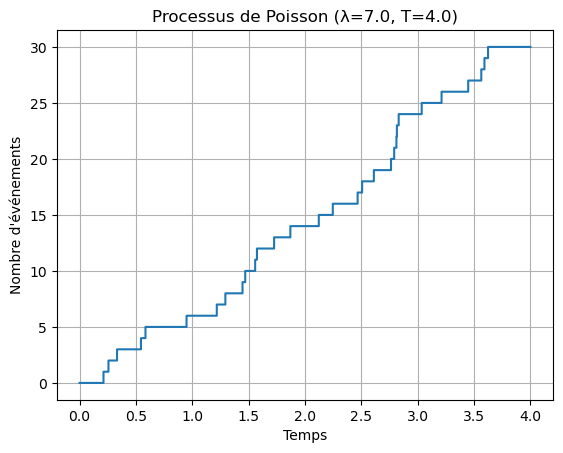

In [8]:
#Exercice6: Processus de Poisson
import numpy as np
import matplotlib.pyplot as plt

lambda_rate = float(input("Taux moyen d'événements par unité de temps (λ) : "))
T = float(input("Durée totale de l'observation (T) : "))

# Générer les temps d'arrivée des événements
temps_arrivees = []
t = 0
while t < T:
    # Temps entre deux événements suit une loi exponentielle de paramètre λ
    t += np.random.exponential(1 / lambda_rate)
    if t < T:
        temps_arrivees.append(t)

# Nombre d'événements à chaque instant (compteur cumulatif)
temps_arrivees = np.array(temps_arrivees)
temps_observation = np.linspace(0, T, 1000)
compteur = np.searchsorted(temps_arrivees, temps_observation)

# Affichage
plt.step(temps_observation, compteur, where='post')
plt.xlabel('Temps')
plt.ylabel("Nombre d'événements")
plt.title(f"Processus de Poisson (λ={lambda_rate}, T={T})")
plt.grid(True)
plt.show()

In [2]:
#Exercice 7 : Inégalité de Bienaymé-Tchebychev
import numpy as np
mu = float(input("Valeur de la moyenne μ : "))
sigma = float(input("Valeur de l'écart type σ : "))
n = int(input("Nombre de variables aléatoires n : "))
epsilon = float(input("Valeur de ε : "))
nb_simulations = int(input("Nombre de simulations à effectuer : "))

ecarts = 0
for _ in range(nb_simulations):
    X = np.random.normal(loc=mu, scale=sigma, size=n)
    X_barre = np.mean(X)
    if abs(X_barre - mu) >= epsilon:
        ecarts += 1

frequence_empirique = ecarts / nb_simulations
borne_theorique = sigma**2 / (n * epsilon**2)

print("\nRésultats de la simulation :")
print(f"Fréquence empirique de |X̄ₙ - μ| ≥ ε : {frequence_empirique:.4f}")
print(f"Borne théorique de Bienaymé-Tchebychev : {borne_theorique:.4f}")


Valeur de la moyenne μ :  7
Valeur de l'écart type σ :  3
Nombre de variables aléatoires n :  4
Valeur de ε :  0.5
Nombre de simulations à effectuer :  4



Résultats de la simulation :
Fréquence empirique de |X̄ₙ - μ| ≥ ε : 0.7500
Borne théorique de Bienaymé-Tchebychev : 9.0000


In [2]:
#Exercice 8 : Entropie empirique
import numpy as np

alphabet = ['a', 'b', 'c']
probabilites = [float(x) for x in input("Entrez les probabilités de 'a', 'b', 'c' séparées par des espaces : ").split()]

# Vérifications
if len(probabilites) != len(alphabet):
    raise ValueError(f"Vous devez entrer exactement {len(alphabet)} probabilités.")
if not np.isclose(sum(probabilites), 1.0):
    raise ValueError("La somme des probabilités doit être égale à 1.")

taille_echantillon = int(input("Taille de l'échantillon à simuler : "))

echantillon = np.random.choice(alphabet, size=taille_echantillon, p=probabilites)

valeurs_uniques, comptes = np.unique(echantillon, return_counts=True)
frequences_empiriques = comptes / taille_echantillon
entropie_empirique = -np.sum(frequences_empiriques * np.log2(frequences_empiriques))

entropie_theorique = -np.sum([p * np.log2(p) for p in probabilites if p > 0])

print("\nRésultats :")
print(f"Entropie empirique : {entropie_empirique:.4f}")
print(f"Entropie théorique : {entropie_theorique:.4f}")


Entrez les probabilités de 'a', 'b', 'c' séparées par des espaces :  0.3 0.5 0.2
Taille de l'échantillon à simuler :  4



Résultats :
Entropie empirique : 0.8113
Entropie théorique : 1.4855
